# TH4:DataFrame va Spark SQL

## Bài tập 1: Tạo và thao tác với DataFrame từ JSON

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("DataFrame JSON Example") \
    .getOrCreate()

25/05/21 19:30:18 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
df1 = spark.read.json("examples/src/main/resources/people.json")

In [3]:
df1.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [4]:
df1.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [5]:
df1.select("name").show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [6]:
df1.select(df1['name'], df1['age'] + 1).show()

+-------+---------+
|   name|(age + 1)|
+-------+---------+
|Michael|     NULL|
|   Andy|       31|
| Justin|       20|
+-------+---------+



In [7]:
df1.filter(df1['age'] > 21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [8]:
df1.groupBy("age").count().show()

[Stage 7:>                                                          (0 + 1) / 1]

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|NULL|    1|
|  30|    1|
+----+-----+



## Bài tập 2: Tạo và thao tác với DataFrame từ file CSV

In [9]:
df2 = spark.read.format("csv").option("header", "true").load("LAB4/ebay.csv")

In [10]:
df2.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|  120|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|  120|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|  120|xbox|    

In [11]:
df2.printSchema()

root
 |-- auctionid: string (nullable = true)
 |-- bid: string (nullable = true)
 |-- bidtime: string (nullable = true)
 |-- bidder: string (nullable = true)
 |-- bidderrate: string (nullable = true)
 |-- openbid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- item: string (nullable = true)
 |-- daystolive: string (nullable = true)



In [12]:
df2.select("auctionid").distinct().count()

627

In [13]:
df2.groupBy("auctionid", "item").count().show()

[Stage 16:>                                                         (0 + 1) / 1]

+----------+-------+-----+
| auctionid|   item|count|
+----------+-------+-----+
|1645883276|cartier|   12|
|1641242797|cartier|    5|
|1642005995|cartier|   18|
|3020060476|   palm|   22|
|1644681469|cartier|   14|
|8212145833|   xbox|   26|
|1638844464|cartier|   16|
|3020573049|   palm|    2|
|3015632013|   palm|   28|
|3024659380|   palm|   26|
|3025373736|   palm|   15|
|8213387659|   xbox|   25|
|1643201832|cartier|    4|
|3014834745|   palm|   21|
|3020257463|   palm|   16|
|3020274575|   palm|   11|
|3019821569|   palm|   27|
|3024707992|   palm|   20|
|8212277835|   xbox|    3|
|3019326870|   palm|   33|
+----------+-------+-----+
only showing top 20 rows



In [14]:
from pyspark.sql.functions import col

df2 = df2.withColumn("price", col("price").cast("float"))

highprice = df2.filter(col("price") > 100)
highprice.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|120.0|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|120.0|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|120.0|xbox|    

## Bài tập 3: Thao tác với DataFrame bằng ngôn ngữ SQL

In [15]:
df1.createOrReplaceTempView("people")

In [16]:
spark.sql("SELECT * FROM people").show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [17]:
spark.sql("SELECT name FROM people").show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [18]:
spark.sql("SELECT name, age + 1 AS age_plus_1 FROM people").show()

+-------+----------+
|   name|age_plus_1|
+-------+----------+
|Michael|      NULL|
|   Andy|        31|
| Justin|        20|
+-------+----------+



In [19]:
spark.sql("SELECT * FROM people WHERE age > 21").show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [20]:
spark.sql("SELECT age, COUNT(*) AS count FROM people GROUP BY age").show()

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|NULL|    1|
|  30|    1|
+----+-----+



## Bài tập 4: Thao tác với DataFrame bằng ngôn ngữ SQL

In [21]:
df2.createOrReplaceTempView("ebay")

In [22]:
sqlDF = spark.sql("SELECT * FROM ebay")
sqlDF.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|120.0|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|120.0|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|120.0|xbox|    

In [23]:
spark.sql("SELECT COUNT(DISTINCT auctionid) AS auction_count FROM ebay").show()

[Stage 28:==========================================================(1 + 0) / 1]

+-------------+
|auction_count|
+-------------+
|          627|
+-------------+



In [24]:
spark.sql("""
    SELECT auctionid, item, COUNT(*) AS bid_count
    FROM ebay
    GROUP BY auctionid, item
""").show()

[Stage 34:>                                                         (0 + 1) / 1]

+----------+-------+---------+
| auctionid|   item|bid_count|
+----------+-------+---------+
|1645883276|cartier|       12|
|1641242797|cartier|        5|
|1642005995|cartier|       18|
|3020060476|   palm|       22|
|1644681469|cartier|       14|
|8212145833|   xbox|       26|
|1638844464|cartier|       16|
|3020573049|   palm|        2|
|3015632013|   palm|       28|
|3024659380|   palm|       26|
|3025373736|   palm|       15|
|8213387659|   xbox|       25|
|1643201832|cartier|        4|
|3014834745|   palm|       21|
|3020257463|   palm|       16|
|3020274575|   palm|       11|
|3019821569|   palm|       27|
|3024707992|   palm|       20|
|8212277835|   xbox|        3|
|3019326870|   palm|       33|
+----------+-------+---------+
only showing top 20 rows



In [25]:
spark.sql("""
    SELECT *
    FROM ebay
    WHERE CAST(price AS FLOAT) > 100
""").show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|120.0|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|120.0|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|120.0|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|120.0|xbox|    

# TH5: Spark MLLib

## Bài tập 1: Thao tác với dữ liệu đầu vào

In [26]:
data = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("LAB4/data_geo.csv")
data.cache()
data.count()

294

Hiển thị thông tin dữ liệu

In [27]:
display(data)
data.printSchema()
#Loại bỏ các dòng có giá trị trống
data = data.dropna()
data.count()
#Tạo View để truy vấn hiển thị dữ liệu
data.createOrReplaceTempView("data_geo")
df1 = spark.sql("""
    SELECT City,
           `State Code`,
           `2014 Population estimate` / 1000 AS `2014 Pop estimate`,
           `2015 median sales price`
    FROM data_geo
""")
display(df1)

DataFrame[2014 rank: int, City: string, State: string, State Code: string, 2014 Population estimate: int, 2015 median sales price: double]

root
 |-- 2014 rank: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- 2014 Population estimate: integer (nullable = true)
 |-- 2015 median sales price: double (nullable = true)



DataFrame[City: string, State Code: string, 2014 Pop estimate: double, 2015 median sales price: double]

Tiền xử lý dữ liệu

In [28]:
pip install numpy --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
from pyspark.mllib.regression import LabeledPoint

# Chọn 2 cột: 2014 Population estimate làm features, 2015 median sales price làm label
data_for_ml = data.select("2014 Population estimate", "2015 median sales price") \
    .rdd \
    .map(lambda r: LabeledPoint(r[1], [r[0]])) \
    .toDF()

display(data_for_ml)

DataFrame[features: vector, label: double]

In [31]:
pip install pandas matplotlib ggplot --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 769.4 kB/s eta 0:00:00MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 1.3 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 1.1 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 1.0 MB/s eta 0:00

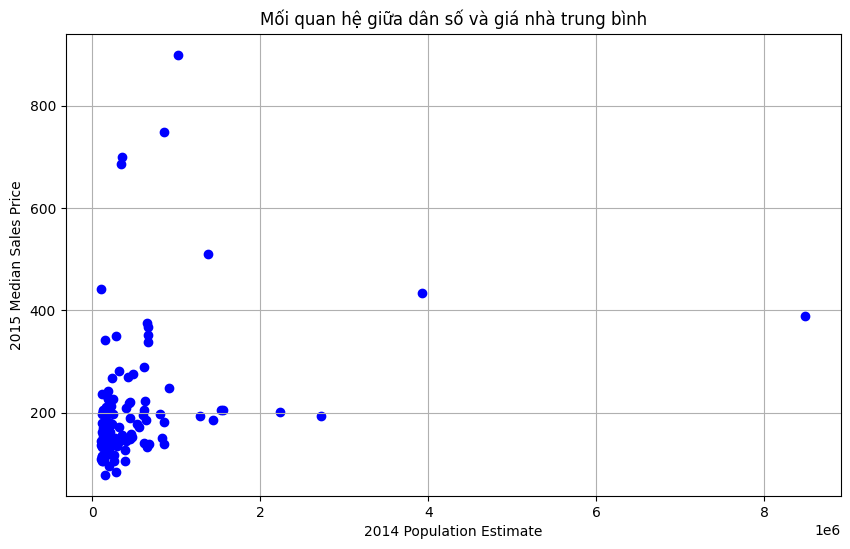

In [38]:
import matplotlib.pyplot as plt

# Lấy dữ liệu từ RDD
x = data_for_ml.rdd.map(lambda p: p.features[0]).collect()
y = data_for_ml.rdd.map(lambda p: p.label).collect()

# Trực quan hoá bằng matplotlib
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.xlabel("2014 Population Estimate")
plt.ylabel("2015 Median Sales Price")
plt.title("Mối quan hệ giữa dân số và giá nhà trung bình")
plt.grid(True)
plt.show()

## Bài tập 2: Sử dụng mô hình hồi quy tuyến tính để dự báo kết quả giá bán

In [51]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="label")

In [52]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Chọn cột làm features và label
assembler = VectorAssembler(inputCols=["2014 Population estimate"], outputCol="features")

data_ml = data.select(col("2015 median sales price").alias("label"), col("2014 Population estimate"))
data_ml = assembler.transform(data_ml).select("features", "label")

In [53]:
# Mô hình không có điều chỉnh (regParam=0.0)
modelA = lr.fit(data_ml, params={lr.regParam: 0.0})

# Mô hình có điều chỉnh mạnh (regParam=100.0)
modelB = lr.fit(data_ml, params={lr.regParam: 100.0})

25/05/21 19:59:06 WARN Instrumentation: [64b77871] regParam is zero, which might cause numerical instability and overfitting.
25/05/21 19:59:07 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/05/21 19:59:07 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [54]:
print(f">>>> ModelA intercept: {modelA.intercept}, coefficient: {modelA.coefficients[0]}")
print(f">>>> ModelB intercept: {modelB.intercept}, coefficient: {modelB.coefficients[0]}")

>>>> ModelA intercept: 191.29427575139394, coefficient: 3.779789682338248e-05
>>>> ModelB intercept: 199.85112564667153, coefficient: 2.1603499483717156e-05


In [55]:
predictionsA = modelA.transform(data_ml)
predictionsB = modelB.transform(data_ml)

display(predictionsA)
display(predictionsB)

DataFrame[features: vector, label: double, prediction: double]

DataFrame[features: vector, label: double, prediction: double]

## Bài tập 3: Đánh giá mô hình dự đoán

In [56]:
from pyspark.ml.evaluation import RegressionEvaluator

In [59]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="label", predictionCol="prediction")

In [60]:
RMSEA = evaluator.evaluate(predictionsA)
print("ModelA: Root Mean Squared Error = " + str(RMSEA))
RMSEB = evaluator.evaluate(predictionsB)
print("ModelB: Root Mean Squared Error = " + str(RMSEB))

ModelA: Root Mean Squared Error = 128.60202684284758
ModelB: Root Mean Squared Error = 129.49630019270606


## Bài tập 4: Trực quan hóa kết quả

In [64]:
import matplotlib.pyplot as plt

# Giả sử data_ml, predictionsA, predictionsB đã có từ bài trước

# Lấy dữ liệu từ dataframe PySpark sang list Python
pop = data_ml.select("features").rdd.map(lambda p: p[0][0]).collect()  # lấy feature đầu tiên (dân số)
price = data_ml.select("label").rdd.map(lambda p: p[0]).collect()     # giá gốc
predA = predictionsA.select("prediction").rdd.map(lambda r: r[0]).collect()
predB = predictionsB.select("prediction").rdd.map(lambda r: r[0]).collect()

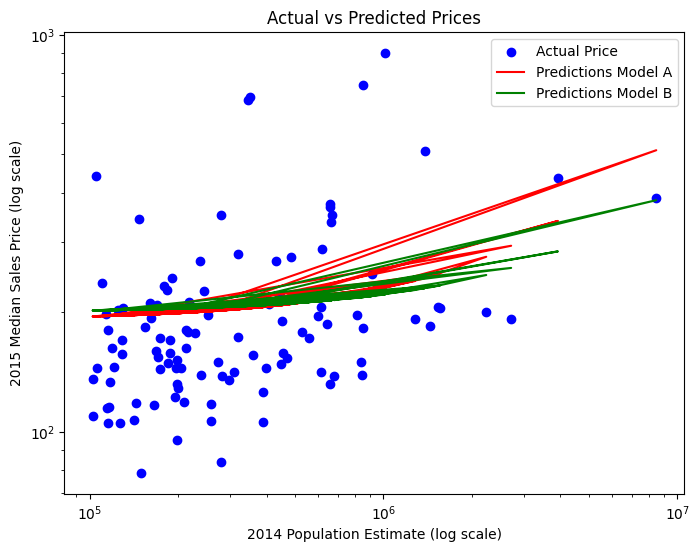

In [65]:
plt.figure(figsize=(8,6))

plt.scatter(pop, price, color='blue', label='Actual Price')
plt.plot(pop, predA, color='red', label='Predictions Model A')
plt.plot(pop, predB, color='green', label='Predictions Model B')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('2014 Population Estimate (log scale)')
plt.ylabel('2015 Median Sales Price (log scale)')
plt.title('Actual vs Predicted Prices')
plt.legend()

plt.show()

#  TH6: Spark MLLib_2

## SparkMLLib_DecisionTree

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_DecisionTree").getOrCreate()

In [7]:
from __future__ import print_function

from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = spark.read.format("libsvm").load("/home/haphuong/Downloads/spark-3.5.5-bin-hadoop3/data/mllib/sample_libsvm_data.txt")

data.show()

data.count()

25/05/21 20:42:16 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.
                                                                                

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



100

In [8]:
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

In [9]:
data.show()

data.count()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



100

In [10]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [11]:
# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[98,99,100,1...|
|       1.0|         1.0|(692,[122,123,124...|
|       1.0|         1.0|(692,[122,123,148...|
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[125,126,127...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[128,129,130...|
|       1.0|         1.0|(692,[129,130,131...|
|       1.0|         1.0|(692,[153,154,155...|
|       1.0|         1.0|(692,[153,154,155...|
|       0.0|         1.0|(692,[154,155,156...|
|       1.0|         1.0|(692,[155,156,180...|
|       0.0|         0.0|(692,[97,98,99,12...|
|       0.0|         0.0|(692,[100,101,102...|
|       0.0| 

## SparkMLLib_KMeans

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_KMeans").getOrCreate()

25/05/21 20:45:18 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [13]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("/home/haphuong/Downloads/spark-3.5.5-bin-hadoop3/data/mllib/sample_libsvm_data.txt")

dataset.show()

dataset.count()

25/05/21 20:46:10 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.


+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



100

In [14]:
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

25/05/21 20:46:25 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
                                                                                

In [15]:
# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.4832019606219527


In [16]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.          

## SparkMLLib_NaiveBayes

In [17]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_NaiveBayes").getOrCreate()

25/05/21 20:48:34 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [18]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load training data
data = spark.read.format("libsvm").load("/home/haphuong/Downloads/spark-3.5.5-bin-hadoop3/data/mllib/sample_libsvm_data.txt")

data.show()
data.count()

25/05/21 20:49:06 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.


+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



100

In [19]:
# Split the data into train and test
splits = data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train)

In [20]:
# select example rows to display.
predictions = model.transform(test)
predictions.show()

# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

+-----+--------------------+--------------------+-----------+----------+
|label|            features|       rawPrediction|probability|prediction|
+-----+--------------------+--------------------+-----------+----------+
|  0.0|(692,[95,96,97,12...|[-172664.79564650...|  [1.0,0.0]|       0.0|
|  0.0|(692,[98,99,100,1...|[-176279.15054306...|  [1.0,0.0]|       0.0|
|  0.0|(692,[122,123,124...|[-189600.55409526...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-274673.88337431...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-183393.03869049...|  [1.0,0.0]|       0.0|
|  0.0|(692,[125,126,127...|[-256992.48807619...|  [1.0,0.0]|       0.0|
|  0.0|(692,[126,127,128...|[-210411.53649773...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-170627.63616681...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-212157.96750469...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-183253.80108550...|  [1.0,0.0]|       0.0|
|  0.0|(692,[128,129,130...|[-246528.93739632...|  

## SparkMLLib_TFIDF

In [21]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_TFIDF").getOrCreate()

25/05/21 20:50:24 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [22]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

sentenceData = spark.createDataFrame([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])

tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
wordsData = tokenizer.transform(sentenceData)

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)
# alternatively, CountVectorizer can also be used to get term frequency vectors

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("label", "features").show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(20,[6,8,13,16],[...|
|  0.0|(20,[0,2,7,13,15,...|
|  1.0|(20,[3,4,6,11,19]...|
+-----+--------------------+

